# The Cancer Gene Atlas Cancer (TCGA) - Kidney Chromophobe (KICH)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Fri Apr 27 11:35:33 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Kidney Chromophobe [KICH]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-KL-8346,8827,KICH,TCGA,a122d361-835e-4cf2-850f-af7864aa112c,KL,62.0,NaN,226,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-KL-8343,8828,KICH,TCGA,b4a0bf74-1381-4c17-b97d-206810d9e59a,KL,72.0,NaN,226,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-KL-8328,8829,KICH,TCGA,452135f2-6de6-4593-a091-ddf6344ee431,KL,60.0,NaN,226,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy",Prostate,"Adenocarcinoma, Not Otherwise Specified",Prior Malignancy,NaN,NaN,NaN
TCGA-KL-8342,8830,KICH,TCGA,c689ae1d-4a6b-45db-b4d1-6b34c5c61522,KL,45.0,NaN,226,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-KL-8325,8831,KICH,TCGA,6101ffe6-2ef6-4256-9d6b-a7c545836995,KL,56.0,NaN,226,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(113, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_KICH_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,116ad953-e0ee-417c-88d2-6c35e621cdbf,5ca0f86f-8e99-4c9b-be31-ca17179c849c,ce716d83-2a24-42d2-9693-e8a13480df9b,08bd1ad7-3b09-4b44-810a-ef69235d79bb,7c14fa65-4e1a-40e7-b865-28af3912136b,6b3c58af-b27f-45e7-9097-3a004ee9a0be,c1af7691-34f6-4318-a959-5ab48442e60f,b9ff0522-e3ff-49c3-857d-d571e62b6b3e,52e004d1-a057-4f7c-afd3-6c850ac5992c,1da07641-0d08-4b21-872d-484ab49873ad,...,53b288ad-acc5-4cbc-9b95-f48aee2a1c99,c037ab74-bddf-49ea-b178-7649a24804ca,6f84c065-8d12-44f2-9cae-2f3b9304c072,27ae28ff-a30f-41c1-8c61-f57e3d95f636,bcbd4dfa-7758-4cf2-b3a0-7d36f1e01853,2993b1d1-283a-479e-8f74-8d6295a41f31,e09aa720-8876-4a39-b570-9d714cc5ebf1,73cdc20e-c7a3-4ce4-a9d6-642ae6d57e9d,e79b1741-0b2a-4e71-8f41-1c28b8c46021,d3ce9704-26d6-4ed2-be67-cf91b1387a36
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,101.814000,120.729000,101.634000,115.456000,151.004000,63.15520,143.762000,89.546900,218.038000,118.580000,...,148.3570,89.74650,106.577000,123.865000,112.893000,81.35230,122.664000,88.645000,121.681000,111.21200
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,45.694700,50.371700,33.184800,50.976400,36.141500,44.93790,22.926500,16.711600,15.759300,53.829500,...,54.2222,3.33879,48.541200,41.793400,47.508900,27.98580,60.682900,34.709600,40.223300,46.60650
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,57.883000,89.197700,92.675800,66.455900,109.825000,96.40510,98.391400,64.062500,102.449000,121.484000,...,130.6160,28.67670,87.373400,98.953800,64.515000,121.76900,120.434000,57.448100,82.780300,119.18400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,40.894800,55.620700,44.272000,38.084400,59.944800,25.68940,50.345600,17.723000,34.440600,36.236000,...,51.8730,17.20500,40.696000,27.956600,50.615700,28.28620,59.960000,25.681500,50.891300,42.12700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.353395,0.031706,0.195769,0.649581,0.181923,0.20029,0.210651,0.047778,0.329761,0.126733,...,0.0000,0.00000,0.647746,0.446475,0.243624,4.34256,0.102537,0.965915,0.165232,0.07824


In [19]:
matrix.shape

(199169, 91)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,116ad953-e0ee-417c-88d2-6c35e621cdbf,5ca0f86f-8e99-4c9b-be31-ca17179c849c,ce716d83-2a24-42d2-9693-e8a13480df9b,08bd1ad7-3b09-4b44-810a-ef69235d79bb,7c14fa65-4e1a-40e7-b865-28af3912136b,6b3c58af-b27f-45e7-9097-3a004ee9a0be,c1af7691-34f6-4318-a959-5ab48442e60f,b9ff0522-e3ff-49c3-857d-d571e62b6b3e,52e004d1-a057-4f7c-afd3-6c850ac5992c,1da07641-0d08-4b21-872d-484ab49873ad,...,53b288ad-acc5-4cbc-9b95-f48aee2a1c99,c037ab74-bddf-49ea-b178-7649a24804ca,6f84c065-8d12-44f2-9cae-2f3b9304c072,27ae28ff-a30f-41c1-8c61-f57e3d95f636,bcbd4dfa-7758-4cf2-b3a0-7d36f1e01853,2993b1d1-283a-479e-8f74-8d6295a41f31,e09aa720-8876-4a39-b570-9d714cc5ebf1,73cdc20e-c7a3-4ce4-a9d6-642ae6d57e9d,e79b1741-0b2a-4e71-8f41-1c28b8c46021,d3ce9704-26d6-4ed2-be67-cf91b1387a36
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,101.814000,120.729000,101.634000,115.456000,151.004000,63.15520,143.762000,89.546900,218.038000,118.580000,...,148.3570,89.74650,106.577000,123.865000,112.893000,81.35230,122.664000,88.645000,121.681000,111.21200
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,45.694700,50.371700,33.184800,50.976400,36.141500,44.93790,22.926500,16.711600,15.759300,53.829500,...,54.2222,3.33879,48.541200,41.793400,47.508900,27.98580,60.682900,34.709600,40.223300,46.60650
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,57.883000,89.197700,92.675800,66.455900,109.825000,96.40510,98.391400,64.062500,102.449000,121.484000,...,130.6160,28.67670,87.373400,98.953800,64.515000,121.76900,120.434000,57.448100,82.780300,119.18400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,40.894800,55.620700,44.272000,38.084400,59.944800,25.68940,50.345600,17.723000,34.440600,36.236000,...,51.8730,17.20500,40.696000,27.956600,50.615700,28.28620,59.960000,25.681500,50.891300,42.12700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.353395,0.031706,0.195769,0.649581,0.181923,0.20029,0.210651,0.047778,0.329761,0.126733,...,0.0000,0.00000,0.647746,0.446475,0.243624,4.34256,0.102537,0.965915,0.165232,0.07824


In [22]:
matrix.shape

(79930, 91)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-KL-8344-01,TCGA-KL-8329-01,TCGA-KL-8335-01,TCGA-KL-8343-01,TCGA-KN-8434-01,TCGA-KO-8410-01,TCGA-KO-8407-01,TCGA-KO-8416-01,TCGA-KL-8324-01,TCGA-KN-8429-01,...,TCGA-KO-8417-01,TCGA-KL-8327-01,TCGA-KM-8440-01,TCGA-KN-8430-01,TCGA-KL-8323-01,TCGA-KL-8332-01,TCGA-KN-8423-01,TCGA-KN-8437-01,TCGA-KL-8340-01,TCGA-KO-8411-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,101.814000,120.729000,101.634000,115.456000,151.004000,63.15520,143.762000,89.546900,218.038000,118.580000,...,148.3570,89.74650,106.577000,123.865000,112.893000,81.35230,122.664000,88.645000,121.681000,111.21200
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,45.694700,50.371700,33.184800,50.976400,36.141500,44.93790,22.926500,16.711600,15.759300,53.829500,...,54.2222,3.33879,48.541200,41.793400,47.508900,27.98580,60.682900,34.709600,40.223300,46.60650
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,57.883000,89.197700,92.675800,66.455900,109.825000,96.40510,98.391400,64.062500,102.449000,121.484000,...,130.6160,28.67670,87.373400,98.953800,64.515000,121.76900,120.434000,57.448100,82.780300,119.18400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,40.894800,55.620700,44.272000,38.084400,59.944800,25.68940,50.345600,17.723000,34.440600,36.236000,...,51.8730,17.20500,40.696000,27.956600,50.615700,28.28620,59.960000,25.681500,50.891300,42.12700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.353395,0.031706,0.195769,0.649581,0.181923,0.20029,0.210651,0.047778,0.329761,0.126733,...,0.0000,0.00000,0.647746,0.446475,0.243624,4.34256,0.102537,0.965915,0.165232,0.07824


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-KL-8344-01,TCGA-KL-8329-01,TCGA-KL-8335-01,TCGA-KL-8343-01,TCGA-KN-8434-01,TCGA-KO-8410-01,TCGA-KO-8407-01,TCGA-KO-8416-01,TCGA-KL-8324-01,TCGA-KN-8429-01,...,TCGA-KO-8417-01,TCGA-KL-8327-01,TCGA-KM-8440-01,TCGA-KN-8430-01,TCGA-KL-8323-01,TCGA-KL-8332-01,TCGA-KN-8423-01,TCGA-KN-8437-01,TCGA-KL-8340-01,TCGA-KO-8411-01
ARF5,101.814000,120.729000,101.634000,115.456000,151.004000,63.15520,143.762000,89.546900,218.038000,118.580000,...,148.3570,89.74650,106.577000,123.865000,112.893000,81.35230,122.664000,88.645000,121.681000,111.21200
M6PR,45.694700,50.371700,33.184800,50.976400,36.141500,44.93790,22.926500,16.711600,15.759300,53.829500,...,54.2222,3.33879,48.541200,41.793400,47.508900,27.98580,60.682900,34.709600,40.223300,46.60650
ESRRA,57.883000,89.197700,92.675800,66.455900,109.825000,96.40510,98.391400,64.062500,102.449000,121.484000,...,130.6160,28.67670,87.373400,98.953800,64.515000,121.76900,120.434000,57.448100,82.780300,119.18400
FKBP4,40.894800,55.620700,44.272000,38.084400,59.944800,25.68940,50.345600,17.723000,34.440600,36.236000,...,51.8730,17.20500,40.696000,27.956600,50.615700,28.28620,59.960000,25.681500,50.891300,42.12700
CYP26B1,0.353395,0.031706,0.195769,0.649581,0.181923,0.20029,0.210651,0.047778,0.329761,0.126733,...,0.0000,0.00000,0.647746,0.446475,0.243624,4.34256,0.102537,0.965915,0.165232,0.07824


# Histogram of First Sample

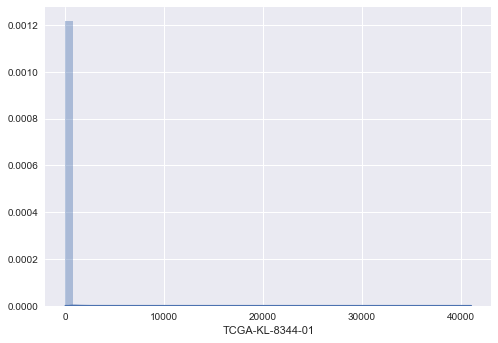

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

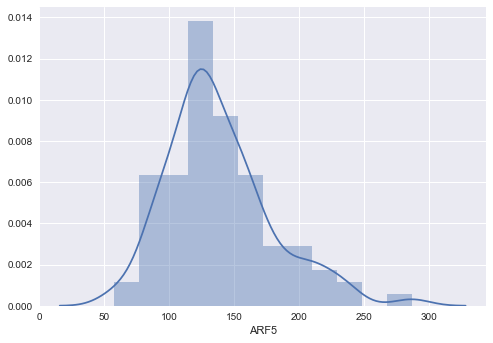

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_kich_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-KL-8344-01,TCGA-KL-8329-01,TCGA-KL-8335-01,TCGA-KL-8343-01,TCGA-KN-8434-01,TCGA-KO-8410-01,TCGA-KO-8407-01,TCGA-KO-8416-01,TCGA-KL-8324-01,TCGA-KN-8429-01,...,TCGA-KO-8417-01,TCGA-KL-8327-01,TCGA-KM-8440-01,TCGA-KN-8430-01,TCGA-KL-8323-01,TCGA-KL-8332-01,TCGA-KN-8423-01,TCGA-KN-8437-01,TCGA-KL-8340-01,TCGA-KO-8411-01
A1BG,0.017274,0.017274,0.008800,0.017274,0.017274,0.017274,0.049351,0.017274,0.003515,0.017274,...,0.017274,0.017274,0.017274,0.017274,0.017274,0.017274,0.017274,0.010547,0.017274,0.017274
A1CF,0.015895,0.026996,0.010916,0.018388,0.009546,0.008354,0.001636,0.001388,0.012143,0.007456,...,0.004249,0.008542,0.012096,0.011654,0.016411,0.036051,0.012310,0.007285,0.008638,0.013887
A2M,238.250000,87.420100,37.871500,62.508300,133.295000,57.956100,98.580600,40.164400,45.420900,61.092800,...,62.673400,13.664400,34.373200,87.351500,61.601200,137.797000,87.527500,94.303500,64.378500,65.334800
A2ML1,0.061923,0.044453,0.081289,0.017806,0.065956,0.048457,0.051812,0.025449,0.068734,0.081471,...,0.030995,0.016059,0.090002,0.028026,0.020558,0.028805,0.064210,0.298560,0.055462,0.064213
A3GALT2,0.032597,0.032597,0.011691,0.013547,0.032597,0.054853,0.032597,0.032597,0.032597,0.032597,...,0.032597,0.011326,0.032597,0.032597,0.015635,0.032597,0.030073,0.032597,0.032597,0.032597


In [34]:
normalized_matrix.shape

(19072, 91)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-KL-8344-01,TCGA-KL-8329-01,TCGA-KL-8335-01,TCGA-KL-8343-01,TCGA-KN-8434-01,TCGA-KO-8410-01,TCGA-KO-8407-01,TCGA-KO-8416-01,TCGA-KL-8324-01,TCGA-KN-8429-01,...,TCGA-KO-8417-01,TCGA-KL-8327-01,TCGA-KM-8440-01,TCGA-KN-8430-01,TCGA-KL-8323-01,TCGA-KL-8332-01,TCGA-KN-8423-01,TCGA-KN-8437-01,TCGA-KL-8340-01,TCGA-KO-8411-01
A1BG,-1.612602,-1.628613,-1.941934,-1.585684,-1.637730,-1.623322,-1.183741,-1.686338,-2.321655,-1.620057,...,-1.619185,-1.655957,-1.624111,-1.644659,-1.643316,-1.648549,-1.603581,-1.876253,-1.645410,-1.611808
A1CF,-1.648736,-1.434715,-1.848363,-1.558534,-1.895311,-1.938804,-2.663216,-2.781264,-1.783297,-1.984934,...,-2.228246,-1.961816,-1.778884,-1.815581,-1.665572,-1.329027,-1.750709,-2.036919,-1.946391,-1.706590
A2M,2.527034,2.075602,1.691902,1.972857,2.249688,1.902381,2.116755,1.680106,1.789640,1.928537,...,1.940502,1.242237,1.674713,2.059215,1.908877,2.253294,2.101167,2.075167,1.925935,1.965940
A2ML1,-1.058150,-1.218112,-0.976381,-1.572524,-1.055875,-1.175361,-1.162602,-1.518058,-1.030442,-0.946448,...,-1.365288,-1.687643,-0.907254,-1.434493,-1.567725,-1.426476,-1.033374,-0.424329,-1.138814,-1.041579
A3GALT2,-1.336815,-1.352825,-1.818566,-1.691241,-1.361942,-1.121514,-1.363852,-1.410551,-1.354432,-1.344269,...,-1.343397,-1.839269,-1.348323,-1.368872,-1.686606,-1.372761,-1.362805,-1.386177,-1.369622,-1.336020


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-KL-8344-01,TCGA-KL-8329-01,TCGA-KL-8335-01,TCGA-KL-8343-01,TCGA-KN-8434-01,TCGA-KO-8410-01,TCGA-KO-8407-01,TCGA-KO-8416-01,TCGA-KL-8324-01,TCGA-KN-8429-01,...,TCGA-KO-8417-01,TCGA-KL-8327-01,TCGA-KM-8440-01,TCGA-KN-8430-01,TCGA-KL-8323-01,TCGA-KL-8332-01,TCGA-KN-8423-01,TCGA-KN-8437-01,TCGA-KL-8340-01,TCGA-KO-8411-01
A1BG,-1.610686,-1.595539,-1.796010,-1.552408,-1.630411,-1.578006,-1.113363,-1.477030,-2.209461,-1.631190,...,-1.589580,-1.462569,-1.557706,-1.617427,-1.623325,-1.625237,-1.620551,-1.767332,-1.587090,-1.562241
A1CF,-1.643421,-1.397580,-1.718001,-1.526653,-1.899061,-1.891607,-2.455331,-2.481249,-1.710962,-2.004958,...,-2.232669,-1.753022,-1.724712,-1.781577,-1.644705,-1.279773,-1.764793,-1.926537,-1.876254,-1.668403
A2M,2.484329,2.058220,1.846717,1.968526,2.298871,1.968526,2.209439,2.007452,1.886244,1.924684,...,1.894829,1.799960,1.738390,2.134565,1.953898,2.340148,2.043623,2.260011,2.019783,1.937413
A2ML1,-1.050219,-1.168665,-0.821684,-1.542142,-1.045464,-1.126431,-1.092539,-1.291807,-0.916389,-0.946442,...,-1.297652,-1.490581,-0.763426,-1.400963,-1.534666,-1.390190,-1.039823,-0.298662,-1.048842,-0.938595
A3GALT2,-1.324879,-1.304209,-1.694519,-1.666177,-1.341856,-1.065513,-1.287937,-1.163381,-1.269567,-1.346229,...,-1.270504,-1.650401,-1.259352,-1.333129,-1.668403,-1.329228,-1.366141,-1.249451,-1.289103,-1.250083


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-KL-8344-01,TCGA-KL-8329-01,TCGA-KL-8335-01,TCGA-KL-8343-01,TCGA-KN-8434-01,TCGA-KO-8410-01,TCGA-KO-8407-01,TCGA-KO-8416-01,TCGA-KL-8324-01,TCGA-KN-8429-01,...,TCGA-KO-8417-01,TCGA-KL-8327-01,TCGA-KM-8440-01,TCGA-KN-8430-01,TCGA-KL-8323-01,TCGA-KL-8332-01,TCGA-KN-8423-01,TCGA-KN-8437-01,TCGA-KL-8340-01,TCGA-KO-8411-01
A1BG,-0.029653,0.096336,-1.571115,0.455082,-0.193721,0.242169,4.106912,1.082054,-5.010056,-0.200200,...,0.145900,1.202333,0.411020,-0.085717,-0.134776,-0.150681,-0.111702,-1.332575,0.166610,0.373295
A1CF,0.255993,0.729274,0.112415,0.480789,-0.236155,-0.221803,-1.307060,-1.356955,0.125965,-0.440021,...,-0.878402,0.044994,0.099495,-0.009979,0.253519,0.956070,0.022332,-0.289050,-0.192246,0.207897
A2M,1.375087,0.045544,-0.614385,-0.234317,0.796422,-0.234317,0.517379,-0.112861,-0.491054,-0.371114,...,-0.464267,-0.760276,-0.952387,0.283757,-0.279959,0.925215,0.000000,0.675171,-0.074384,-0.331395
A2ML1,0.314837,-0.116470,1.147023,-1.476445,0.332154,0.037321,0.160734,-0.564876,0.802166,0.692729,...,-0.586162,-1.288689,1.359161,-0.962356,-1.449221,-0.923129,0.352694,3.051549,0.319851,0.721304
A3GALT2,0.210857,0.338987,-2.080439,-1.904758,0.105623,1.818599,0.439852,1.211941,0.553718,0.078514,...,0.547911,-1.806967,0.617042,0.159719,-1.918558,0.183900,-0.044912,0.678415,0.432625,0.674500


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19072, 91)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18629, 91)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18540, 91)

# Histogram of First Sample

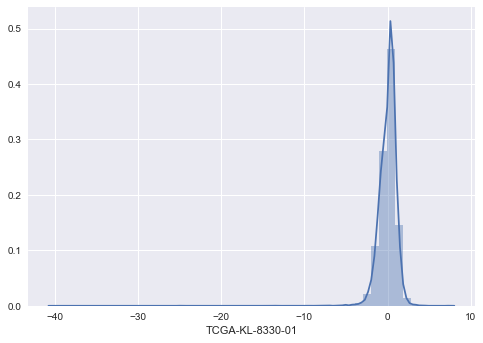

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

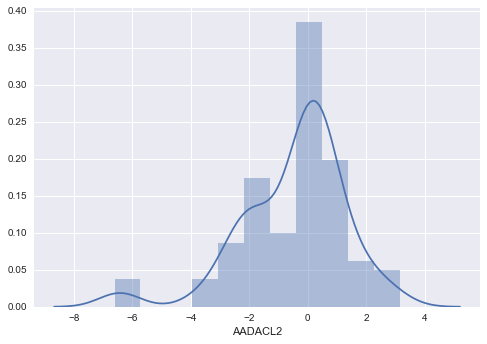

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_kich_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18540, 2)

# Save Gene List

In [56]:
filename = path+'tcga_kich_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-KL-8323-01,57,FEMALE,M0,NX,T3b,Stage III,Kidney Chromophobe,Primary Solid Tumor,Kidney,NaN
TCGA-KL-8324-01,67,FEMALE,M0,NX,T2,Stage II,Kidney Chromophobe,Primary Solid Tumor,Kidney,NaN
TCGA-KL-8324-11,67,FEMALE,M0,NX,T2,Stage II,Kidney Chromophobe,Solid Tissue Normal,Kidney,NaN
TCGA-KL-8325-01,56,FEMALE,M0,NX,T2,Stage II,Kidney Chromophobe,Primary Solid Tumor,Kidney,NaN
TCGA-KL-8326-01,69,MALE,M0,N0,T3a,Stage III,Kidney Chromophobe,Primary Solid Tumor,Kidney,NaN


In [60]:
attribute_list.shape

(91, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_kich_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-KL-8323-01,TCGA-KL-8324-01,TCGA-KL-8324-11,TCGA-KL-8325-01,TCGA-KL-8326-01,TCGA-KL-8326-11,TCGA-KL-8327-01,TCGA-KL-8328-01,TCGA-KL-8329-01,TCGA-KL-8329-11,...,TCGA-KO-8408-01,TCGA-KO-8409-01,TCGA-KO-8410-01,TCGA-KO-8411-01,TCGA-KO-8413-01,TCGA-KO-8414-01,TCGA-KO-8415-01,TCGA-KO-8415-11,TCGA-KO-8416-01,TCGA-KO-8417-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.187145,-0.977796,-0.714385,0.054495,0.912290,-0.538627,0.868316,0.670147,0.142464,-0.560531,...,0.098490,0.934314,0.340188,0.450146,-0.099222,0.516077,-0.999626,-0.933916,0.802232,0.208384
A1CF,0.165152,0.121245,0.825081,0.450945,0.055286,0.891076,0.033312,-0.318132,0.363026,0.957070,...,-0.691588,-0.735508,-0.296224,0.143240,-0.669626,0.758978,-0.603671,0.736985,-0.955069,-0.757476
A2M,-0.225612,-0.379431,0.895723,-0.621013,-0.774803,0.521496,-0.664977,-0.972374,0.037976,0.719639,...,-0.071783,-0.686949,-0.181695,-0.269543,0.499570,-0.401321,-0.423367,0.389585,-0.093805,-0.335423
A2ML1,-0.877633,0.594610,0.198792,0.616617,-0.767820,0.924737,-0.811764,-0.108790,-0.086799,-0.174710,...,-0.416359,-0.548115,0.023006,0.550591,0.088979,-0.723917,-0.855650,-0.701938,-0.394356,-0.460331
A3GALT2,-0.745833,0.484591,-0.196673,0.242841,-0.657989,-0.921553,-0.701938,0.704596,0.220866,-0.372416,...,0.286780,0.880751,0.902729,0.572528,0.066959,-0.789778,0.616617,-0.526213,0.770599,0.462626


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

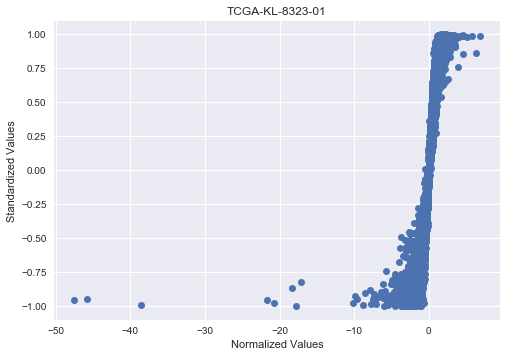

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_kich_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-KL-8323-01,TCGA-KL-8324-01,TCGA-KL-8324-11,TCGA-KL-8325-01,TCGA-KL-8326-01,TCGA-KL-8326-11,TCGA-KL-8327-01,TCGA-KL-8328-01,TCGA-KL-8329-01,TCGA-KL-8329-11,...,TCGA-KO-8408-01,TCGA-KO-8409-01,TCGA-KO-8410-01,TCGA-KO-8411-01,TCGA-KO-8413-01,TCGA-KO-8414-01,TCGA-KO-8415-01,TCGA-KO-8415-11,TCGA-KO-8416-01,TCGA-KO-8417-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,0
A2M,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_kich_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_kich_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_kich_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_kich_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_kich_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-KL-8323, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8324, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8324, Age:67.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8325, Age:56.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8326, Age:69.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8326, Age:69.0, Gender:MALE, SampleType:Solid Tissue Normal, Stage:Stage III, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8327, Age:46.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8328, Age:60.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8329, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KL-8329, Age:57.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)",...,"(Donor:TCGA-KO-8408, Age:47.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8409, Age:69.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8410, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8411, Age:58.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8413, Age:46.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8414, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8415, Age:44.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8415, Age:44.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8416, Age:41.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)","(Donor:TCGA-KO-8417, Age:30.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-KL-8323, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)",1.000000,-0.076626,-0.096842,0.175890,-0.129418,-0.071711,-0.032753,0.071845,0.120191,-0.061370,...,0.036615,-0.111994,0.008756,0.138205,-0.016691,0.006023,0.029583,-0.067446,0.105125,0.147173
"(Donor:TCGA-KL-8324, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Kidney Chromophobe, Tissue:Kidney, Tumor:nan, Gradenan)",-0.076626,1.000000,-0.090042,-0.069538,0.134969,-0.079650,0.235268,0.131719,0.020941,-0.116894,...,0.244058,0.325394,0.034441,-0.106782,0.247809,0.285114,0.318829,-0.145093,0.064251,-0.017406
"(Donor:TCGA-KL-8324, Age:67.0, Gender:FEMA

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_kich_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.356056,-0.273758,-0.049271,0.079651,-0.055453,-0.083196,0.292577,-0.068124,0.316187,...,0.115806,-0.039559,0.136871,0.275391,0.065263,-0.318012,0.289852,-0.280777,0.154921,-0.047976
A1CF,-0.356056,1.000000,0.484391,-0.031971,-0.281859,0.159025,-0.058155,-0.447019,-0.058142,-0.437644,...,-0.294650,0.003209,-0.305649,-0.627543,0.090523,0.722073,-0.366545,0.250702,-0.441299,0.102305
A2M,-0.273758,0.484391,1.000000,-0.069203,-0.292088,0.343556,-0.012565,-0.483396,-0.147061,-0.405803,...,-0.370329,-0.257188,-0.080161,-0.442809,0.053032,0.320520,-0.268288,0.411817,-0.196868,0.245810
A2ML1,-0.049271,-0.031971,-0.069203,1.000000,0.048797,-0.193292,-0.020717,-0.051468,0.087702,-0.174808,...,0.076653,0.197756,0.164718,0.049893,0.073713,0.031575,0.050393,-0.146690,0.001423,0.308918
A3GALT2,0.079651,-0.281859,-0.292088,0.048797,1.000000,-0.087374,0.048857,0.174938,0.091820,0.110576,...,0.226930,0.140111,0.110895,0.152051,-0.154861,-0.148974,0.026935,-0.164561,-0.020100,-0.091349


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_kich_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_kich_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  91 Out of 91   

 The number of statisticaly relevent gene-attribute associations is: 84676
